In [6]:
import json
import time
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import quandl
from config import api_key
import csv
import os

# Master Data - CSV

In [7]:
master_data_path = os.path.join("..", "..", "data", "project_one_data", "master_data_cleaned.csv")
master_data_df = pd.read_csv(master_data_path)
master_data_df.head()

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
0,2016,Apr,2016-4,4/30/2016,4/28/2016,Z2BR,ZHVI 2-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",384884.0,30566.0,3.5,3.88,3.66
1,2016,Apr,2016-4,4/30/2016,4/28/2016,Z4BR,ZHVI 4-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",881951.0,30566.0,3.5,3.88,3.66
2,2016,Apr,2016-4,4/30/2016,4/28/2016,Z5BR,ZHVI 5+ Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",1287769.0,30566.0,3.5,3.88,3.66
3,2016,Apr,2016-4,4/30/2016,4/28/2016,ZATT,ZHVI All Homes- Top Tier Time Series ($),753871,metro,"Breckenridge, CO; CO",842653.0,30566.0,3.5,3.88,3.66
4,2016,Apr,2016-4,4/30/2016,4/28/2016,Z1BR,ZHVI 1-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",243688.0,30566.0,3.5,3.88,3.66


# SSAM - Median Prices, All Homes

In [10]:
# Look at SSAM - All Homes Monthly
ssam_df = master_data_df[master_data_df["Indicator ID"] == "SSAM"]

# SSSM - Median Prices, Single Family Residence

This section looks at all single family residence median prices over time from April 2016 to August 2020. 

## Master SSSM DataFrame

In [11]:
# Look at SSSM - SFR Only
sssm_df = master_data_df[master_data_df["Indicator ID"] == "SSSM"]
sssm_df.head()

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
411,2016,Apr,2016-4,4/30/2016,4/28/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394484,metro,"Colorado Springs, CO",249350.0,689481.0,3.5,3.88,3.66
558,2016,May,2016-5,5/31/2016,5/5/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394484,metro,"Colorado Springs, CO",254975.0,689481.0,3.4,3.75,3.61
559,2016,May,2016-5,5/31/2016,5/12/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394484,metro,"Colorado Springs, CO",254975.0,689481.0,3.4,3.75,3.57
560,2016,May,2016-5,5/31/2016,5/19/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394484,metro,"Colorado Springs, CO",254975.0,689481.0,3.4,3.88,3.58
561,2016,May,2016-5,5/31/2016,5/26/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394484,metro,"Colorado Springs, CO",254975.0,689481.0,3.4,3.88,3.64


In [12]:
sssm_all = master_data_df[(master_data_df["Indicator ID"] =="SSSM")]
sssm_all = sssm_all.sort_values("Year-Month")
sssm_all = sssm_all.groupby("Year-Month").first()
sssm_all.head()

,Year,Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
Year-Month,,,,,,,,,,,,,,
2016-10,2016,Oct,10/31/2016,10/6/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394530,metro,"Denver, CO",378931.0,697744.0,3.1,3.63,3.42
2016-11,2016,Nov,11/30/2016,11/17/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394530,metro,"Denver, CO",377375.0,697744.0,3.0,4.13,3.94
2016-12,2016,Dec,12/31/2016,12/29/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",301613.0,294867.0,2.9,4.50,4.32
2016-4,2016,Apr,4/30/2016,4/28/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",278367.0,294867.0,3.5,3.88,3.66
2016-5,2016,May,5/31/2016,5/26/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394530,metro,"Denver, CO",371973.0,697744.0,3.4,3.88,3.64


In [13]:
all_sssm_unemp_x = sssm_all["Unemployment Rate"]
all_sssm_value_y = sssm_all["Value"]

correlation = st.pearsonr(all_sssm_unemp_x,all_sssm_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

The correlation between the unemployment rate and median sale price is: 0.3214883502129601.
P-Value is: 0.018907369025041733.


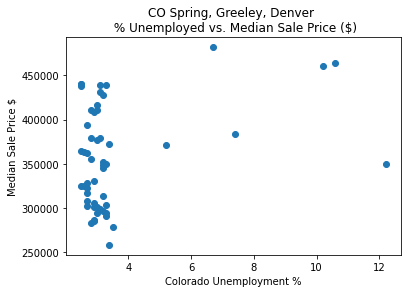

In [18]:
plt.scatter(all_sssm_unemp_x, all_sssm_value_y)
plt.title("CO Spring, Greeley, Denver \n % Unemployed vs. Median Sale Price ($)")
plt.xlabel("Colorado Unemployment %")
plt.ylabel("Median Sale Price $")
plt.show()

Text(0.5, 1.0, '')

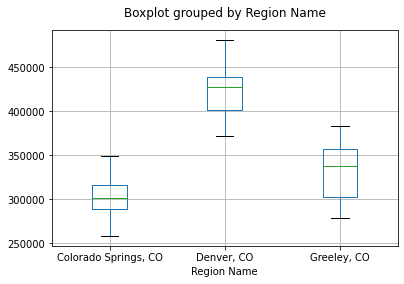

In [22]:
sssm_all.boxplot(by="Region Name", column="Value").set_title("")

### Fredie Mac & Unemployment Correlation

In [ ]:
all_sssm_unemp_x = sssm_all["Unemployment Rate"]
all_sssm_fmr_y = sssm_all["Freddie Mac Rate"]

correlation = st.pearsonr(all_sssm_unemp_x,all_sssm_fmr_y)
print(f"The correlation between the unemployment rate and Freddit Mac Rate is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

### Wells Fargo & Unemployment Correlation

In [ ]:
all_sssm_unemp_x = sssm_all["Unemployment Rate"]
all_sssm_wf_y = sssm_all["Wells Fargo Rate"]

correlation = st.pearsonr(all_sssm_unemp_x,all_sssm_wf_y)
print(f"The correlation between the unemployment rate and median sale price is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

In [ ]:
# Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(all_sssm_unemp_x, all_sssm_wf_y)
wf_regress_values = all_sssm_unemp_x * slope + intercept

# Line Equation
wf_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(greeley_unem_x,greeley_value_y)

### Correlation: All Unemployed, Median Sale Price

In [ ]:
all_sssm_unemp_x = sssm_df["Unemployment Rate"]
all_sssm_value_y = sssm_df["Value"]

correlation = st.pearsonr(all_sssm_unemp_x,all_sssm_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

### Correlation: Greeley - Unemployed, Median Sale Price

In [ ]:
sssm_df_greely = sssm_df[sssm_df["Region Name"].str.contains("Greeley")]

In [ ]:
greeley_sssm_unemp_x = sssm_df_greely["Unemployment Rate"]
greeley_sssm_value_y = sssm_df_greely["Value"]

correlation = st.pearsonr(greeley_sssm_unemp_x,greeley_sssm_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

In [ ]:
# Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(greeley_sssm_unemp_x, greeley_sssm_value_y)
greeley_regress_values = greeley_sssm_unemp_x * slope + intercept

# Line Equation
greeley_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(greeley_sssm_unemp_x,greeley_sssm_value_y)
plt.plot(greeley_sssm_unemp_x,greeley_regress_values,"r-")

# Design Plot
plt.annotate(greeley_line_eq,(6, 280000),fontsize=15,color="red")
plt.title("Greeley, CO \n Unemploment % vs. Median Sale Price")
plt.xlabel("Unemployment %")
plt.ylabel('Median Sale Price')

# Show
plt.show()

### Correlation: Colorado Springs - Unemployed, Median Sale Price

In [ ]:
sssm_df_cosprings = master_data_df[(master_data_df["Indicator ID"] =="SSSM") & master_data_df["Region Name"].str.contains("Colorado Springs")]
sssm_df_cosprings = sssm_df_cosprings.groupby("Year-Month").first()

In [ ]:
cosprings_sssm_unemp_x = sssm_df_cosprings["Unemployment Rate"]
cosprings_sssm_value_y = sssm_df_cosprings["Value"]

correlation = st.pearsonr(cosprings_sssm_unemp_x,cosprings_sssm_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

### Correlation: Denver - Unemployed, Median Sale Price

In [ ]:
sssm_denver_df = master_data_df[(master_data_df["Indicator ID"] =="SSSM") & master_data_df["Region Name"].str.contains("Denver") ]
sssm_denver_df = sssm_denver_df.groupby("Year-Month").first()

In [ ]:
denver_sssm_unemp_x = sssm_denver_df["Unemployment Rate"]
denver_sssm_value_y = sssm_denver_df["Value"]

correlation = st.pearsonr(denver_sssm_unemp_x,denver_sssm_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

In [ ]:
# No Data on SSSM for Breckenridge, CO
# sssm_df_breck = sssm_df[sssm_df["Region Name"].str.contains("Breckenridge")]
# sssm_df_breck
# sssm_df["Region Name"].unique()

In [ ]:
# sssm_greeley_scatter = sssm_df_greely.plot("Unemployment Rate", "Value", kind="scatter")

# # Find Correlation
# correlation = st.pearsonr(greeley_unem_x,greeley_value_y)
# print(f"The correlation between the unemployment rate and median sale price value in Greeley, CO is: {correlation[0]}.")
# print(f"P-Value is: {correlation[1]}.")

# # FIND LINEAR REGRESSION
# greeley_unem_x = sssm_df_greely["Unemployment Rate"]
# greeley_value_y = sssm_df_greely["Value"]

# # Formula
# (slope, intercept, rvalue, pvalue, stderr) = linregress(greeley_unem_x, greeley_value_y)
# greeley_regress_values = greeley_unem_x * slope + intercept

# # Line Equation
# greeley_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Plot
# plt.scatter(greeley_unem_x,greeley_value_y)
# plt.plot(greeley_unem_x,greeley_regress_values,"r-")

# # Design Plot
# plt.annotate(greeley_line_eq,(6, 280000),fontsize=15,color="red")
# plt.xlabel("Unemployment %")
# plt.ylabel('Median Sale Price')

# # Show
# plt.show()